In [57]:
from split_video_gpx import parse_gpx


%matplotlib inline
import geopandas as gp
from shapely.geometry import LineString
import pandas as pd
import utils; reload(utils)
from utils import *


In [ ]:
%load snap2road

In [3]:
raw_gpx_dir = 'Sample Data/'
raw_list = [x.replace('\\','/') for x in find_files(raw_gpx_dir, '*.gpx')]

In [4]:
# make sure downsample is maintain correspondence between loc and timestamp
for gpx in raw_list:
    vfile, raw_locs, tms = parse_gpx(gpx)
    down_raw_locs = downsample_by_step_include_last(raw_locs)
    down_tms = downsample_by_step_include_last(tms)
    match = {t: l for t, l in zip(down_tms, down_raw_locs)}

    for l, t in zip(raw_locs, tms):
        if t in match:
            assert l==match[t]

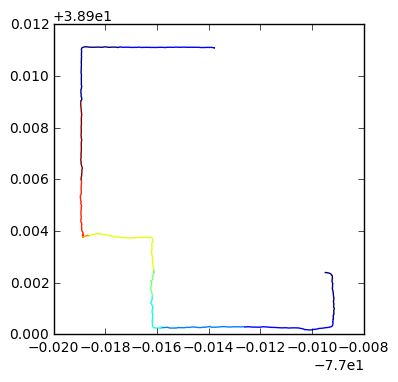

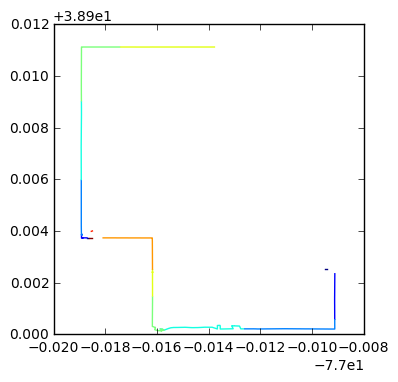

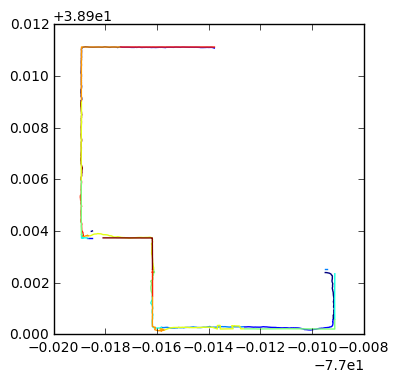

In [47]:
gpx = 'Sample Data/GPX/Track_2017-02-21 125536.gpx'
gpx = 'Sample Data/GPX/Track_2017-02-21 131933.gpx'

vfile, raw_locs, tms = parse_gpx(gpx)

snapped_res = snap2road(raw_locs,tms)
snapped_df = pd.DataFrame.from_dict(snapped_res['snapped'])
raw_df = pd.DataFrame.from_dict(snapped_res['raw'])

raw_df['geometry'] = raw_df.raw.apply(LineString)
raw_gpdf = gp.GeoDataFrame(raw_df)
raw_gpdf.plot()

snapped_df['geometry'] = snapped_df.snapped.apply(LineString)
snapped_gpdf = gp.GeoDataFrame(snapped_df)
snapped_gpdf.plot()

raw_gpdf.append(snapped_gpdf).plot()

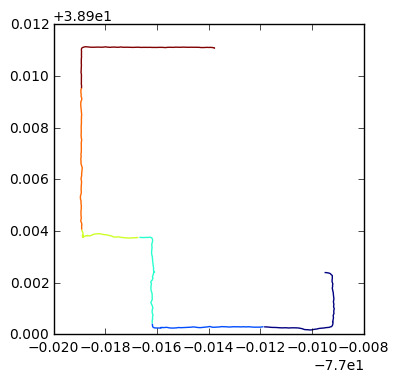

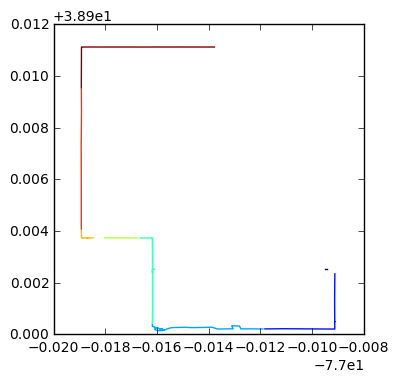

In [34]:

down_raw_locs = downsample_by_step_include_last(raw_locs, step=2)
down_tms = downsample_by_step_include_last(tms, step=2)

snapped_res_down = snap2road(down_raw_locs,down_tms)
snapped_df_down = pd.DataFrame.from_dict(snapped_res_down['snapped'])
raw_df_down = pd.DataFrame.from_dict(snapped_res_down['raw'])

raw_df_down['geometry'] = raw_df_down.raw.apply(LineString)
raw_gpdf_down = gp.GeoDataFrame(raw_df_down)
raw_gpdf_down.plot()

snapped_df_down['geometry'] = snapped_df_down.snapped.apply(LineString)
snapped_gpdf_down = gp.GeoDataFrame(snapped_df_down)
snapped_gpdf_down.plot()

In [55]:

def parse_snapped_json(json_data):
    """
    :param json_data: it could be a) file_path; b) json string; c) loaded json data
    """
    import os, json
    if os.path.isfile(json_data):
        json_data = load_json_file(json_data)
    elif isinstance(json_data, str):
        json_data = json.loads(json_data)
    
    return json_data
        